## ANALYSIS OF UBER PICKUPS IN NEW YORK CITY

I have taken a dataset which has over 4.5 million Uber Pickups from April to September of year 2014.

Link to the data set is - https://www.kaggle.com/datasets/fivethirtyeight/uber-pickups-in-new-york-city

License is : CC0 Public Domain

Public Domain Licence is a document intended to allow you to freely share, modify, and use this work for any purpose and without any restrictions. This licence is intended for use on databases or their contents (“data”), either together or individually.

Data Type: Raw

Data Size:
uber-raw-data-apr14.csv - 24.9 MB
uber-raw-data-may14.csv - 28.7 MB
uber-raw-data-jun14.csv - 29.2 MB
uber-raw-data-jul14.csv - 35.1 MB
uber-raw-data-aug14.csv - 36.5 MB
uber-raw-data-sep14.csv - 45.3 MB

In [1]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
ds1=pd.read_csv("C:/Users/jaspa/Downloads/uber-raw-data-apr14.csv")
ds2=pd.read_csv("C:/Users/jaspa/Downloads/uber-raw-data-may14.csv")
ds3=pd.read_csv("C:/Users/jaspa/Downloads/uber-raw-data-jun14.csv")
ds4=pd.read_csv("C:/Users/jaspa/Downloads/uber-raw-data-jul14.csv")
ds5=pd.read_csv("C:/Users/jaspa/Downloads/uber-raw-data-aug14.csv")
ds6=pd.read_csv("C:/Users/jaspa/Downloads/uber-raw-data-sep14.csv")

In [3]:
#Aggretation of 6upper files in 1 using concat function 
agg_ds=pd.concat([ds1,ds2,ds3,ds4,ds5,ds6])

In [4]:
#Checking the Final DF
agg_ds

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [5]:
#Summary of DATASET 
agg_ds.describe()

,Lat,Lon
count,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01
std,3.994991e-02,5.726670e-02
min,3.965690e+01,-7.492900e+01
25%,4.072110e+01,-7.399650e+01
50%,4.074220e+01,-7.398340e+01
75%,4.076100e+01,-7.396530e+01
max,4.211660e+01,-7.206660e+01


In [7]:
agg_ds['Date/Time'] = pd.to_datetime(agg_ds['Date/Time'])

In [9]:
#Getting the Month from the final dataset

agg_ds['Month'] = agg_ds['Date/Time'].dt.month

In [10]:
agg_ds['Month']

0          4
1          4
2          4
3          4
4          4
          ..
1028131    9
1028132    9
1028133    9
1028134    9
1028135    9
Name: Month, Length: 4534327, dtype: int64

In [11]:
#Sorting the final data based on the month
agg_ds=agg_ds.sort_values(by='Month', ascending=False)

#Changing the month values and converting them to the names of the month 
agg_ds['Month'] = agg_ds['Month'].apply(lambda x: calendar.month_abbr[x])

In [12]:
agg_ds['Month']

1028135    Sep
342707     Sep
342720     Sep
342719     Sep
342718     Sep
          ... 
376351     Apr
376352     Apr
376353     Apr
376354     Apr
0          Apr
Name: Month, Length: 4534327, dtype: object

In [13]:
#Getting the Day from the dataset 
agg_ds['Day'] = agg_ds['Date/Time'].dt.day

In [14]:
#Getting the DAY OF THE WEEK from the dataset
agg_ds['DOW'] = agg_ds['Date/Time'].dt.dayofweek

In [15]:
#Final dataset
agg_ds

,Date/Time,Lat,Lon,Base,Month,Day,DOW
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,Sep,30,1
342707,2014-09-06 10:48:00,40.6733,-73.9763,B02617,Sep,6,5
342720,2014-09-06 10:50:00,40.7218,-73.9947,B02617,Sep,6,5
342719,2014-09-06 10:50:00,40.7933,-73.9152,B02617,Sep,6,5
342718,2014-09-06 10:50:00,40.7152,-74.0131,B02617,Sep,6,5
...,...,...,...,...,...,...,...
376351,2014-04-07 05:25:00,40.7283,-74.0031,B02682,Apr,7,0
376352,2014-04-07 05:25:00,40.6141,-73.9187,B02682,Apr,7,0
376353,2014-04-07 05:26:00,40.7341,-73.9812,B02682,Apr,7,0
376354,2014-04-07 05:26:00,40.7349,-73.9813,B02682,Apr,7,0


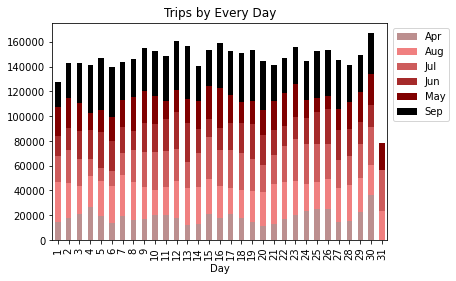

In [16]:
#Daily Trips for Each Month
agg_ds.groupby(['Month','Day'])['Day'].count().unstack('Month').plot.bar(stacked=True,color=("rosybrown","lightcoral","indianred","brown","maroon","black"),title="Trips by Every Day").legend(bbox_to_anchor=(1.2, 1))

In [17]:
agg_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 1028135 to 0
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   Day        int64         
 6   DOW        int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 242.2+ MB


In [18]:
agg_ds.describe()

,Lat,Lon,Day,DOW
count,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01,1.594337e+01,2.968115e+00
std,3.994991e-02,5.726670e-02,8.744902e+00,1.875971e+00
min,3.965690e+01,-7.492900e+01,1.000000e+00,0.000000e+00
25%,4.072110e+01,-7.399650e+01,9.000000e+00,1.000000e+00
50%,4.074220e+01,-7.398340e+01,1.600000e+01,3.000000e+00
75%,4.076100e+01,-7.396530e+01,2.300000e+01,5.000000e+00
max,4.211660e+01,-7.206660e+01,3.100000e+01,6.000000e+00


### Things that work and did not work

Initially the date and time column were in object format because of whcih it was hard to load and transform data. Then, after working and figuring out how to change to type I changed it to Data/Time type which helped the data to load and transform easily.

### Characteristics of the dataset

The dataset has columns like Data/Time, Latitude, Longitude along with the Base. Based on the latitude and longitude the base column shows the particular region for it. As I described earlier, I changed the date and time column from object format to Date/Time format to branch out different components of month, day and day of the week. After this I can use the date and time to understand the trend better.